<a href="https://colab.research.google.com/github/JankovitsA/hitelek_beadando/blob/main/hitelek_beadando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_voo = yf.download("VOO",
  start='2011-01-01',
  end='2021-12-31',
  progress=False,
  group_by="ticker")


In [ ]:
df_voo=df_voo['Adj Close']

df_voo.fillna(method='ffill')
df_voo=pd.DataFrame(df_voo)
#log return
df_voo['log_ret'] = np.log(df_voo['Adj Close']) - np.log(df_voo['Adj Close'].shift(1))

df_voo.head(3)

,Adj Close,log_ret
Date,,
2011-01-03,92.316978,NaN
2011-01-04,92.237534,-0.000861
2011-01-05,92.730057,0.005326


In [ ]:
df_iei = yf.download("IEI",
  start='2011-01-01',
  end='2021-12-31',
  progress=False,
  group_by="ticker")


In [ ]:
df_iei=df_iei['Adj Close']

df_iei.fillna(method='ffill')
df_iei=pd.DataFrame(df_iei)
#log return
df_iei['log_ret'] = np.log(df_iei['Adj Close']) - np.log(df_iei['Adj Close'].shift(1))

df_iei.head(3)

,Adj Close,log_ret
Date,,
2011-01-03,97.002914,NaN
2011-01-04,97.062096,0.000610
2011-01-05,96.520912,-0.005591


Feladat 1:
Select two financial assets and download their historical price data.

Calculate the daily returns for each asset.

Construct two-asset portfolios with varying weights to examine the concept of diversification. For each weight combination, calculate the historical VaR of the portfolios.

Compare these VaR values and write a brief explanation on the impact of diversification.


In [ ]:
portfolio = pd.DataFrame(
    {'IEI': df_iei['log_ret'] ,
    'VOO': df_voo['log_ret']
    })

In [ ]:
def calcPortfolioReturn(portfReturns, weights):
    simpleReturns = np.exp(portfReturns) -1
    portfolioReturn = np.sum(simpleReturns * weights, axis = 1)
    portfolioLogReturn = np.log(1+portfolioReturn)
    #portfolioReturn = np.sum(portfReturns * weights, axis = 1)
    return portfolioLogReturn

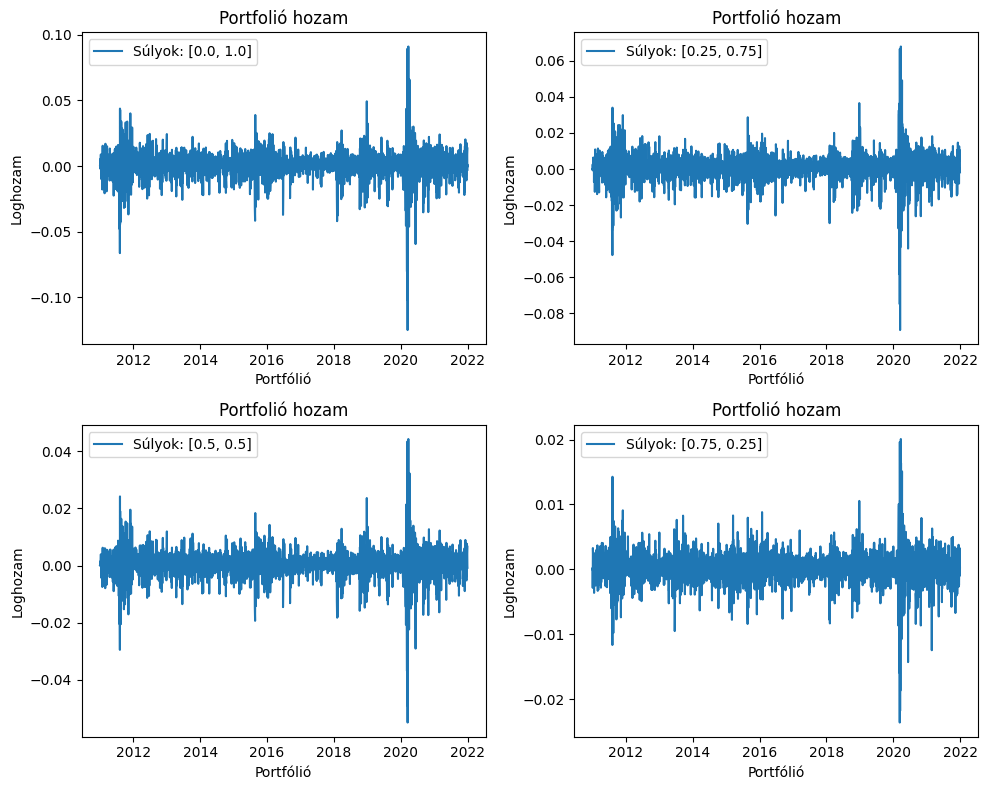

In [ ]:
def plot_portfolio_returns(portfReturns, weights):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    for i, weight in enumerate(weights):
        row = i // 2
        col = i % 2
        portfolioReturn = calcPortfolioReturn(portfReturns, weight)
        label = f"Súlyok: {weight}"
        axs[row, col].plot(portfolioReturn, label=label)
        axs[row, col].set_xlabel('Portfólió')
        axs[row, col].set_ylabel('Loghozam')
        axs[row, col].set_title(f"Portfolió hozam")
        axs[row, col].legend()
    plt.tight_layout()
    plt.show()

# Portfólió hozamok és súlyok definiálása
portfReturns = np.array([[0.1, 0.2],
                         [0.3, 0.4]])
weights = [[0.0, 1.0],
           [0.25, 0.75],
           [0.5, 0.5],
           [0.75, 0.25]]

# Plot készítése
plot_portfolio_returns(portfolio, weights)

In [ ]:
def calc_historical_var(portf_ret,alpha):
  l_conf_levels=1-alpha
  df_ret = portf_ret
  df_result_ret = df_ret.quantile(1-alpha)
  df_result_ret = df_result_ret.transpose()
  return df_result_ret

In [ ]:
VaRs = []
for i in range(0,100):
  w1 = i/100
  w2 = 1 - w1
  portfolio_return = calcPortfolioReturn(portfolio, [w1,w2])
  VaR = calc_historical_var(portfolio_return,0.95)
  VaRs.append(VaR)


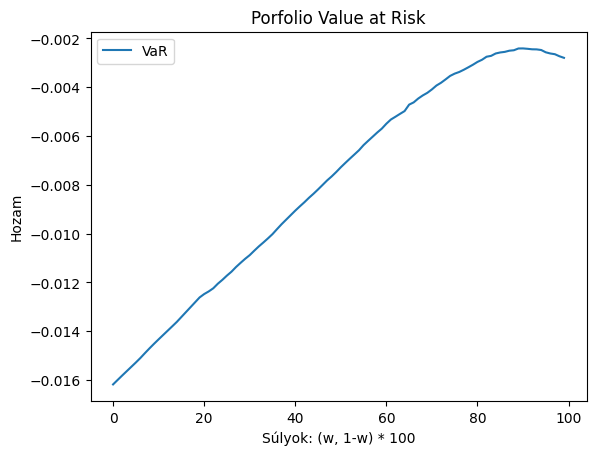

In [ ]:
plt.plot(VaRs)
plt.title("Porfolio Value at Risk")
plt.ylabel("Hozam")
plt.xlabel("Súlyok: (w, 1-w) * 100")
plt.legend(["VaR"])

Feladat 2: Using the same two assets from Exercise 1, generate potential future price paths for these assets using a simulation based on their historical returns and volatilities.

Assume a fixed weight for each asset in the portfolio. The weight should be inversely proportional to the asset's volatility.

Calculate the VaR of the portfolio under different correlation assumptions between the two assets.

Write a brief comment on how changing the correlation between the two assets affects the portfolio's VaR.

In [ ]:
#step1: covariance matrix szamitas
def calculate_covariance_matrix(std_x, std_y, corr):
    cov_xy = std_x * std_y * corr
    cov_matrix = np.array([[std_x ** 2, cov_xy], [cov_xy, std_y ** 2]])
    return cov_matrix


#print(calculate_covariance_matrix(0.2, 0.05, 0.1))
#step2: hozamok generalasa
def calc_asset_returns(mean, cov, size):
    return np.random.multivariate_normal(mean, cov, size)

In [ ]:

std_iei = np.std(df_iei)[1]
std_voo = np.std(df_voo)[1]
mean_iei = np.mean(df_iei)[1]
mean_voo = np.mean((df_voo))[1]
correl = df_iei['log_ret'].corr(df_voo['log_ret'])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
std_iei = np.std(np.exp(df_iei)-1)[1]
std_voo = np.std(np.exp(df_voo)-1)[1]
mean_iei = np.mean(np.exp(df_iei)-1)[1]
mean_voo = np.mean(np.exp(df_voo)-1)[1]
print(mean_iei*252)
print(mean_voo*252)
print(std_iei*(252**(0.5)))
print(std_voo*(252**(0.5)))

0.02422124449262388
0.1544726156423251
0.030170231784689982
0.17028617703621182


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:966: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
covar_matrix = calculate_covariance_matrix(std_iei, std_voo, correl)
sim_returns = calc_asset_returns(np.array([mean_iei, mean_voo]), covar_matrix, 100)

iei_return = []
voo_return = []
for i in range(len(sim_returns)):
  iei_return.append(sim_returns[i][0])
  voo_return.append(sim_returns[i][1])

In [ ]:
iei_return = pd.DataFrame(iei_return)
voo_return = pd.DataFrame(voo_return)

In [ ]:
#calculate portfolio:
#weights:
w = std_voo/(std_voo+std_iei)
sim_portfolio = w*iei_return+(1-w)*voo_return


In [ ]:
def sim_portfolio_returns(df1,df2,correl):
  std_iei = np.std(df1)
  std_voo = np.std(df2)
  mean_iei = np.mean(df1)
  mean_voo = np.mean(df2)
  #call 2 functions to simulate returns:
  covar_matrix = calculate_covariance_matrix(std_iei, std_voo, correl)
  sim_returns = calc_asset_returns(np.array([mean_iei, mean_voo]), covar_matrix, 100)
  iei_return = []
  voo_return = []
  #extract returns from np.array:
  for i in range(len(sim_returns)):
    iei_return.append(sim_returns[i][0])
    voo_return.append(sim_returns[i][1])
  #convert returns to pd.DataFrame:
  iei_return = pd.DataFrame(iei_return)
  voo_return = pd.DataFrame(voo_return)
  w = std_voo/(std_voo+std_iei)
  sim_log_portfolio = w*np.exp(iei_return) + (1-w)*voo_return
  sim_portfolio = np.log(1+sim_log_portfolio)
  return sim_portfolio


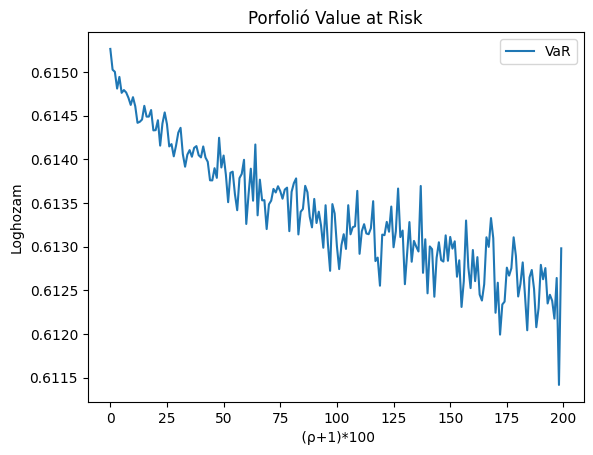

In [ ]:
VaRs = []
x_ticks = []
x_labels = []
for i in range(-100,100):
  correl = i/100
  portfolio_return = sim_portfolio_returns(df_iei['log_ret'],df_voo['log_ret'],correl)
  VaR = calc_historical_var(portfolio_return,0.95)
  VaRs.append(VaR)


#add x-axis values to plot
plt.plot(VaRs)
plt.title("Porfolió Value at Risk")
plt.ylabel("Loghozam")
plt.xlabel(f" (ρ+1)*100")
plt.legend(["VaR"])


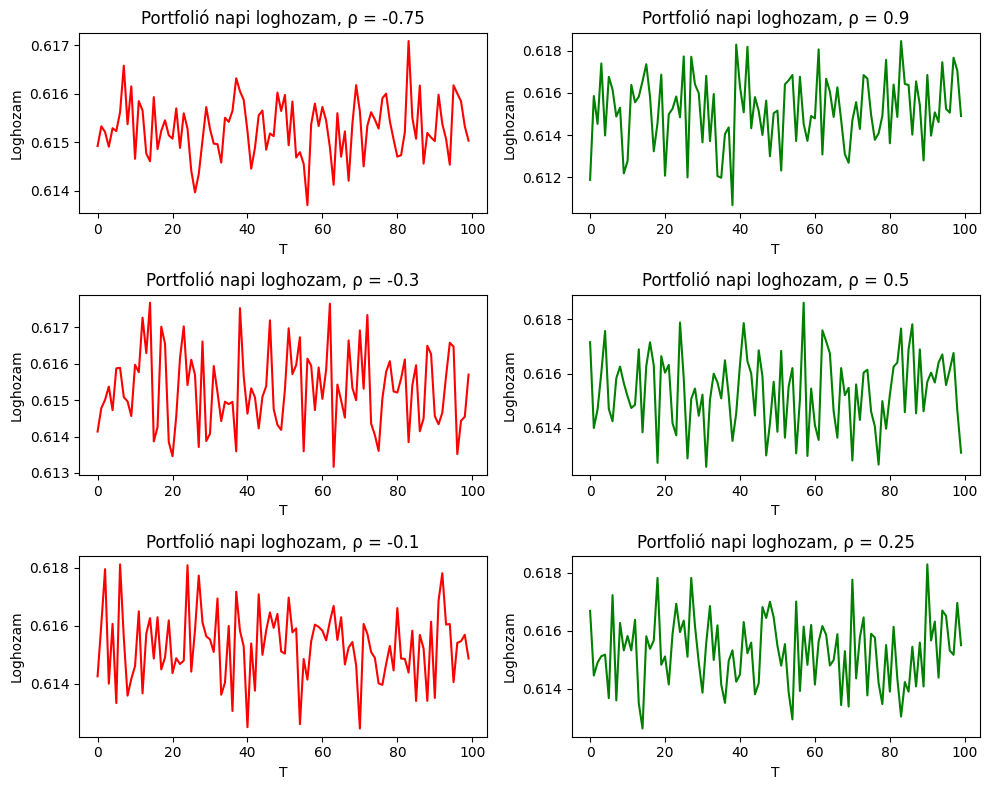

In [ ]:
correl_factors = [-0.75,0.9,-0.3,0.5,-0.1,0.25]
colors = ['red' if val < 0 else 'green' for val in correl_factors]

def plot_portfolio_returns(correls):
    fig, axs = plt.subplots(3, 2, figsize=(10, 8))
    for i, correl in enumerate(correl_factors):
        row = i // 2
        col = i % 2
        coloring = colors[i]
        portfolioReturn = sim_portfolio_returns(df_iei['log_ret'],df_voo['log_ret'],correl)
        label = f"Weight: {correl}"
        axs[row, col].plot(portfolioReturn, label=label, color=coloring)
        axs[row, col].set_xlabel(f"T")
        axs[row, col].set_ylabel('Loghozam')
        axs[row, col].set_title(f"Portfolió napi loghozam, ρ = {correl}")
        #axs[row, col].legend()
    plt.tight_layout()
    plt.show()

# Portfólió hozamok és súlyok definiálása

# Plot készítése
plot_portfolio_returns(correl_factors)

Feladat 3: Choose an Exchange-Traded Fund (ETF) and download its historical price data.

Calculate and plot the variance of ETF returns using an Exponentially Weighted Moving Average (EWMA) with decay factors of 0.94 and 0.97 over a window of 100 days.

Reflect on your findings and how they relate to the concepts covered in the lesson on 5/16.

In [ ]:
def calculate_ewma_weights(decay_factor, window_size):
    # Create an array of length `window_size` with values [1, 2, ..., window_size]
    t = np.arange(1, window_size+1)

    # Calculate the weights using the EWMA formula
    weights = np.exp(-decay_factor * t)

    # Normalize the weights to sum to 1
    weights /= weights.sum()

    return weights

In [ ]:
decay_factors = [0.94, 0.97]
window_sizes = [100, 252]

for decay_factor in decay_factors:
    for window_size in window_sizes:
        weights = calculate_ewma_weights(decay_factor, window_size)
        print(f"Decay factor: {decay_factor}, window size: {window_size}")
        print(weights)
        print()

Decay factor: 0.94, window size: 100
[6.09372165e-01 2.38037730e-01 9.29841630e-02 3.63222023e-02
 1.41884633e-02 5.54240870e-03 2.16501911e-03 8.45716729e-04
 3.30360495e-04 1.29048005e-04 5.04097429e-05 1.96914487e-05
 7.69202800e-06 3.00472025e-06 1.17372737e-06 4.58490580e-07
 1.79099183e-07 6.99611261e-08 2.73287633e-08 1.06753756e-08
 4.17009888e-09 1.62895670e-09 6.36315829e-10 2.48562675e-10
 9.70954996e-11 3.79282048e-11 1.48158125e-11 5.78746878e-12
 2.26074640e-12 8.83110474e-13 3.44967533e-13 1.34753921e-13
 5.26386323e-14 2.05621150e-14 8.03213447e-15 3.13757530e-15
 1.22562425e-15 4.78762947e-16 1.87018134e-16 7.30544887e-17
 2.85371168e-17 1.11473922e-17 4.35448167e-18 1.70098175e-18
 6.64450819e-19 2.59552985e-19 1.01388621e-19 3.96052174e-20
 1.54709004e-20 6.04336432e-21 2.36070632e-21 9.22157600e-22
 3.60220427e-22 1.40712126e-22 5.49660731e-23 2.14712781e-23
 8.38727890e-24 3.27630460e-24 1.27981577e-24 4.99931666e-25
 1.95287224e-25 7.62846258e-26 2.97988982e-26 1.

In [ ]:
def forecast_volatility(returns,window_size,decay_factor):
    # Calculate the squared returns
    squared_returns = np.square(returns)

    # Calculate the EWMA weights
    weights = calculate_ewma_weights(decay_factor, window_size)

    # Apply the EWMA weights to the squared returns
    weighted_returns = squared_returns[-window_size:] * weights[::-1]

    # Calculate the EWMA volatility forecast
    volatility_forecast = np.sqrt(weighted_returns.sum())

    return volatility_forecast

In [ ]:
def calculate_ewma_variance(df_etf_returns, decay_factor, window):
    window_size = window
    log_returns = df_etf_returns['log_ret']
    num_returns = len(log_returns)
    volatility_forecasts = []
    real_volatilities = []
    forecast_dates=[]
    #saving the dates
    X = pd.DataFrame()
    X['Dates'] = pd.DataFrame(df_etf_returns.index)

    for i in range(window_size, num_returns-1):
        returns_window = log_returns[i - window_size:i]
        volatility = forecast_volatility(returns_window, window_size,decay_factor)
        real_volatility=np.square(log_returns[i+1])
        #dates = X.iloc[i+1]
        dates = df_etf_returns.index.date[i+1]
        volatility_forecasts.append(volatility)
        real_volatilities.append(np.sqrt(real_volatility))
        forecast_dates.append(dates)
    percentile_list = pd.DataFrame(
    {'Date': forecast_dates,
    'Forecasts': volatility_forecasts,
    'Real': real_volatilities
    })

    return percentile_list

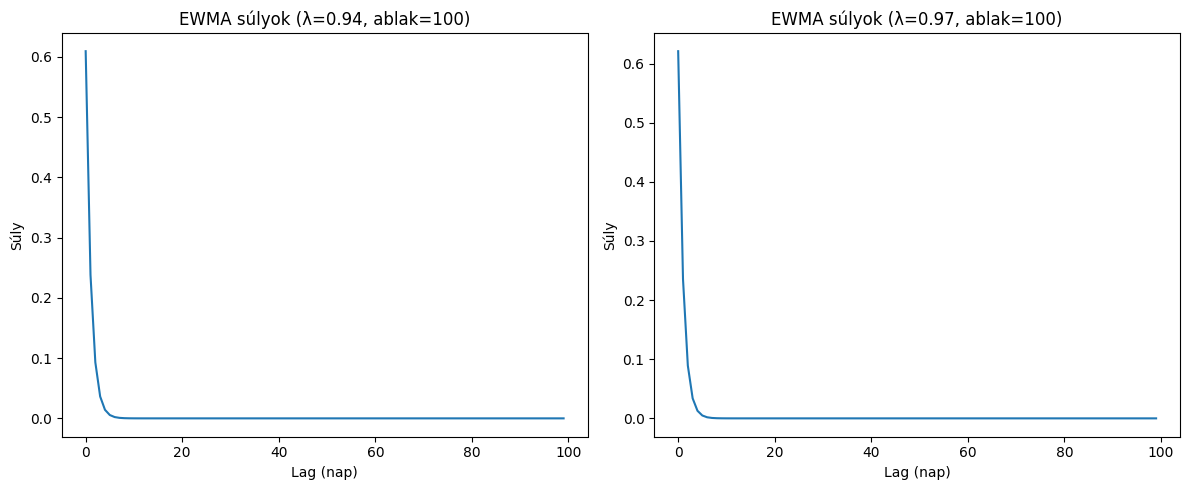

In [ ]:
def plot_ewma_weights(weights):
    lag = np.arange(len(weights))
    plt.plot(lag, weights)
    plt.xlabel('Lag (days)')
    plt.ylabel('Weight')
    plt.title('EWMA Weights')
    plt.show()

def plot_ewma_weights(ax, weights, decay_factor, window_size):
    lag = np.arange(len(weights))
    ax.plot(lag, weights)
    ax.set_xlabel('Lag (nap)')
    ax.set_ylabel('Súly')
    ax.set_title(f'EWMA súlyok (λ={decay_factor}, ablak={window_size})')

# Generate the subplots for the four combinations of decay factor and window size
decay_factors = [0.94, 0.97]
window_sizes = 100

fig, axes = plt.subplots( 1, len(decay_factors),figsize=(12, 5))

for i, decay_factor in enumerate(decay_factors):
  weights = calculate_ewma_weights(decay_factor, window_sizes)
  plot_ewma_weights(axes[i], weights, decay_factor, window_sizes)

plt.tight_layout()
plt.show()

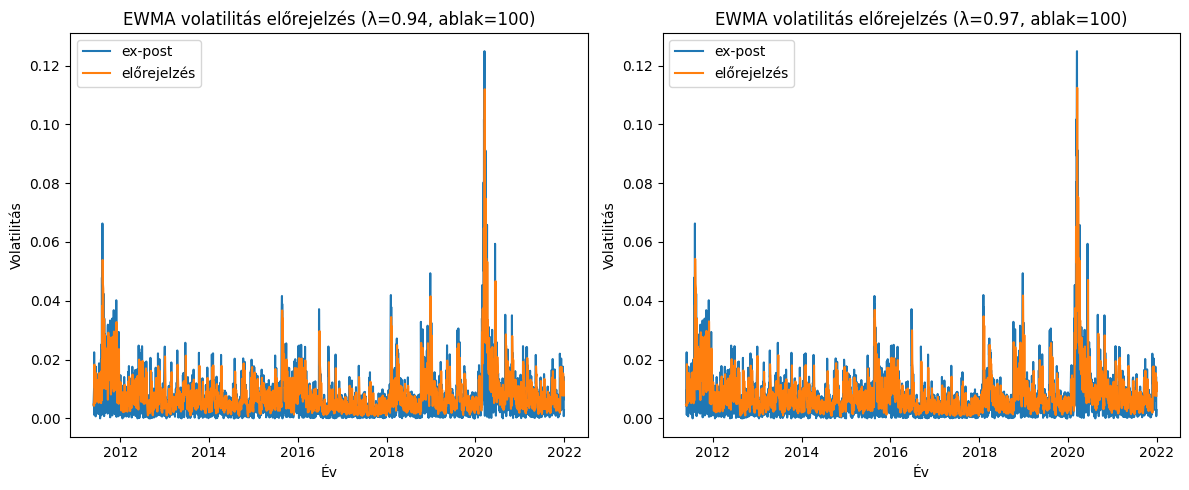

In [ ]:
# Generate the subplots for the four combinations of decay factor and window size
decay_factors = [0.94, 0.97]
window_sizes = 100

def plot_ewma_variance(ax, dataFrame, decay_factor, window_size):
    forecasts = dataFrame['Forecasts']
    Date = dataFrame['Date']
    realVol = dataFrame['Real']
    ax.plot(Date,realVol)
    ax.plot(Date,forecasts)
    ax.set_xlabel('Év')
    ax.set_ylabel('Volatilitás')
    ax.set_title(f'EWMA volatilitás előrejelzés (λ={decay_factor}, ablak={window_size})')
    ax.legend(['ex-post','előrejelzés'])

fig, axes = fig, axes = plt.subplots( 1, len(decay_factors),figsize=(12, 5))

for i, decay_factor in enumerate(decay_factors):
  outData = calculate_ewma_variance(df_voo,decay_factor,window_sizes)
  plot_ewma_variance(axes[i], outData, decay_factor, window_sizes)

plt.tight_layout()
plt.show()

Use the same asset as in Exercise 3

Compute the daily returns and the squared returns for this asset.

Employ a linear regression model with cross-validation to predict future variance based on lagged squared returns. For lags do not use more than 20.

Evaluate your model's performance using the Mean Squared Error (MSE) as the error metric.

Write a brief commentary on your model's effectiveness.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

# Calculate daily returns and square returns (omit first na value)
daily_returns = df_voo['log_ret'].dropna()
squared_returns = df_voo['log_ret'].dropna() **2

# Lag minimum to maximum values
max_lag = 20
lags = range(1, max_lag + 1)
lagged_sq_returns = pd.DataFrame()
for lag in lags:
    lagged_sq_returns[f'Lag_{lag}'] = np.roll(squared_returns, lag)

# Remove the first max_lag rows to align with lagged features
lagged_sq_returns = lagged_sq_returns[max_lag:]
target = squared_returns[max_lag:]

# Cross validation of 5 subsets, test, train split
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []

# Set best lag to 1, after perform the gridsearch
best_mse = float('inf')
best_lag = 1
mse_counter = []

for lag in lags:
    lagged_sq_returns_subset = lagged_sq_returns[f'Lag_{lag}'].values.reshape(-1, 1)

    for train_index, test_index in tscv.split(lagged_sq_returns_subset):
        X_train, X_test = lagged_sq_returns_subset[train_index], lagged_sq_returns_subset[test_index]
        y_train, y_test = target[train_index], target[test_index]

        # Linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Evaluate
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    mean_mse = np.mean(mse_scores)
    mse_counter.append(mean_mse)

    if mean_mse < best_mse:
        best_mse = mean_mse
        best_lag = lag

print(f"Best Lag: {best_lag}")

# Select the best lag to evaluate the data:
lagged_sq_returns_best = lagged_sq_returns[f'Lag_{best_lag}'].values.reshape(-1, 1)

mse_scores = []

for train_index, test_index in tscv.split(lagged_sq_returns_best):
    X_train, X_test = lagged_sq_returns_best[train_index], lagged_sq_returns_best[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Linear regression:
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate mean MSE across all folds
mean_mse = np.mean(mse_scores)

print(f"Mean Squared Error: {mean_mse}")

Best Lag: 2
Mean Squared Error: 2.0041929745485509e-07


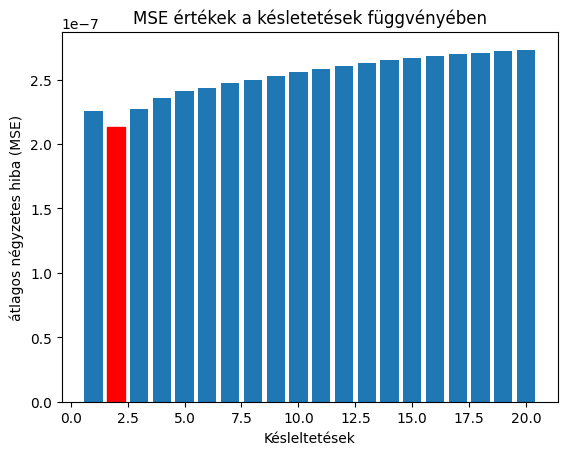

In [ ]:
#bar chart:
x_axis_val = range(1,21)

#plt.bar(x_axis_val, mse_counter)
barlist=plt.bar(x_axis_val, mse_counter)
barlist[1].set_color('r')
#plt.show()
plt.title('MSE értékek a késletetések függvényében')
plt.xlabel('Késleltetések')
plt.ylabel('átlagos négyzetes hiba (MSE)')
plt.show()